In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart breaking showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.

In [3]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
    #"facecolor": (0, 0, 0, .1),
    #"facealpha":.4,
    #"grid": True, 
    #"grid.axis": 'y'   
}

plt.rc("axes", **axes_settings)

### Data Prep

In [5]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [6]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             # "World ex-Brazil"
                                                              ], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


### Meshgrid Layout

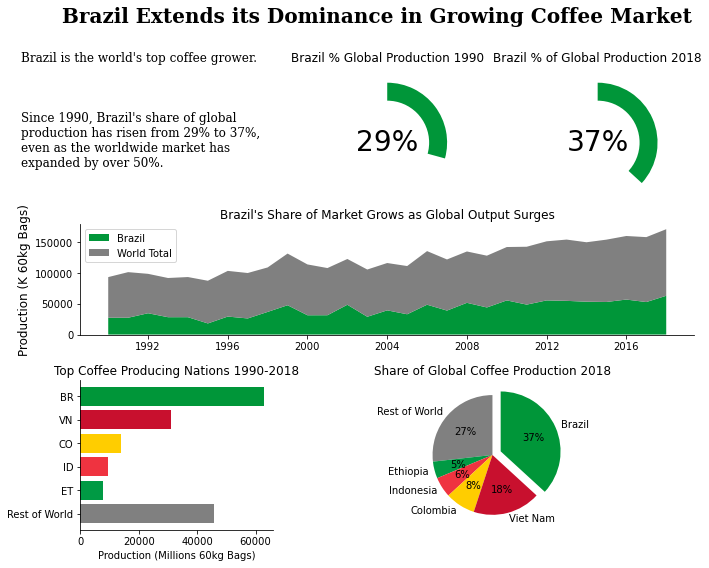

In [11]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(11, 8.5))

gs = gridspec.GridSpec(nrows=12, ncols=6 )

fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market", 
             fontsize=20, 
             fontweight="bold",
             fontfamily='serif'
            )

fig.text(.05, .695, 
'''Brazil is the world's top coffee grower.



Since 1990, Brazil's share of global 
production has risen from 29% to 37%, 
even as the worldwide market has 
expanded by over 50%.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

ax1 = fig.add_subplot(gs[0:4, 2:4])


ax1.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
  

ax1.set_title("Brazil % Global Production 1990", fontsize=12)


ax2 = fig.add_subplot(gs[0:4, 4:])


ax2.pie(
    brazil_vs_others.iloc[-1].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "#009639"]
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=28
)
  

ax2.set_title("Brazil % of Global Production 2018", fontsize=12)



ax3 = fig.add_subplot(gs[4:7, :])

ax3.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"],
    colors=["#009639", "grey"]
)


ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")

ax3.set_ylabel("Production (K 60kg Bags)", fontsize=12)


ax3.legend(loc="upper left")

ax4 = fig.add_subplot(gs[8:, 0:2])

ax4.barh(y=coffee_production_top5_2018.index[::-1], 
        width=coffee_production_top5_2018.iloc[::-1],
        color=["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639"])


positions = list(range(6))
labels = ["BR", "VN", "CO", "ID", "ET", "Rest of World"][::-1]

ax4.set_title("Top Coffee Producing Nations 1990-2018")
ax4.set_xlabel("Production (Millions 60kg Bags)", fontsize=10)
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)



ax5 = fig.add_subplot(gs[8:, 2:])

ax5.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90,
       colors = ["grey", "#009A44", "#EF3340", "#FFCD00", "#C8102E", "#009639", "#C8102E", ],
       explode=(0, 0, 0, 0, 0, .15))

ax5.set_title("Share of Global Coffee Production 2018")

plt.show()

fig.savefig('brazil_stats.png', bbox_inches='tight', facecolor="white")

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [8]:
prices_paid_to_growers = pd.read_csv("../Data/coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.head()

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

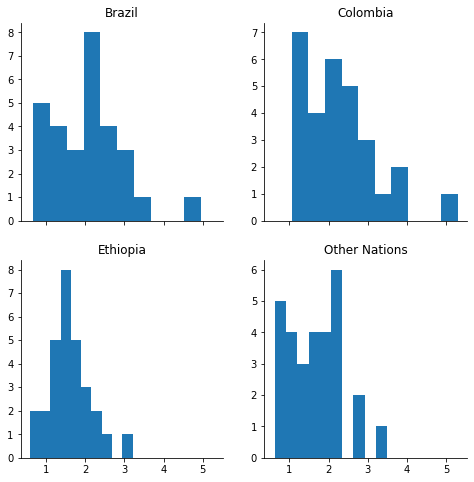

In [10]:
fig, ax = plt.subplots(2, 2, sharex='all', figsize=(8, 8))


ax[0][0].set_title("Brazil")
ax[0][0].hist(prices_paid_to_growers["Brazil"])

ax[0][1].set_title("Colombia")
ax[0][1].hist(prices_paid_to_growers["Colombia"])

ax[1][0].set_title("Ethiopia")
ax[1][0].hist(prices_paid_to_growers["Ethiopia"])

ax[1][1].set_title("Other Nations")
ax[1][1].hist(prices_paid_to_growers["Other Nations"])

plt.show()